In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
from impala.dbapi import connect
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',1000)
from matplotlib.font_manager import FontProperties
chinese = FontProperties(fname = 'C:/Windows/Fonts/msyh.ttc')
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# # data = pd.read_csv("D:/GitHub/datasets/190821_ShopOrders.csv")

# # 查询所有字段
# def list_col(localhost,database, port,tabls_name):
#     db = connect(localhost,port,database)
#     cursor = db.cursor()
#     cursor.execute("select * from %s" % tabls_name)
#     col_name_list = [tuple[0] for tuple in cursor.description]
#     db.close()
#     return col_name_list

# # 列出所有的表
# def list_table(localhost,database,port):
#     db = connect(localhost,database,port)
#     cursor = db.cursor()
#     cursor.execute("show tables")
#     table_list = [tuple[0] for tuple in cursor.fetchall()]
#     db.close()
#     return table_list

# # 数据库信息
# port = 21050 # 端口号
# host = "172.22.210.29" # 连接地址
# database = "bigtables" # 数据库名
# tabls_name = "shop_order" # 表名

# table_names = list_table(host,port,database) 
# # print('库中所有表名:',*table_names,sep = '\n  ')
# column_names = list_col(host,database, port,tabls_name)
# # column_names = ["user_id","create_date","payable_rmb_amount","buy_num","status"]
# # print('表中所有字段名:',*column_names,sep = '\n  ')

# conn = connect(host=host,port =port , database = database,timeout=3600 )
# cur_data = conn.cursor()
# cur_data.execute('''SELECT *
# from shop_order 
# where create_date between "2019-01-01 00:00:00" AND "2019-07-31 23:59:59";''')
# data=cur_data.fetchall()
# data = pd.DataFrame(data,columns=column_names)

# data = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")

In [3]:
# data.shape
# data1 = data.copy()
# data1 = data1[data1["status"] == 1]
# data1.shape
# df = data1[["user_id","create_date","payable_rmb_amount","buy_num"]]
# df["create_date"] = pd.to_datetime(df["create_date"])
# df["date"] = df["create_date"].dt.date
# df["month"] = df["date"].values.astype('datetime64[M]')

In [4]:
df = pd.read_csv("D:/GitHub/datasets/shop_order_190101_190731.csv")
# df.to_csv("D:/GitHub/datasets/shop_order_190101_190731.csv",index=False)


In [5]:
df.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1/1
1,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1/1
2,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1/1
3,9937889,2019/1/1 11:04,7.0,1,2019/1/1,2019/1/1
4,4963922,2019/1/1 11:19,7.0,1,2019/1/1,2019/1/1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213843 entries, 0 to 213842
Data columns (total 6 columns):
user_id               213843 non-null int64
create_date           213843 non-null object
payable_rmb_amount    213843 non-null float64
buy_num               213843 non-null int64
date                  213843 non-null object
month                 213843 non-null object
dtypes: float64(1), int64(2), object(3)
memory usage: 9.8+ MB


In [7]:
# 共213843单支付成功，平均每单消费7.16元，75%消费6元以下
df.describe()

,user_id,payable_rmb_amount,buy_num
count,2.138430e+05,213843.000000,213843.0
mean,5.663011e+06,7.237698,1.0
std,4.104763e+06,14.468073,0.0
min,3.000000e+00,0.000000,1.0
25%,2.104415e+06,3.990000,1.0
50%,4.503539e+06,4.990000,1.0
75%,9.526026e+06,5.990000,1.0
max,1.697181e+07,299.000000,1.0


In [8]:
# 按用户分组
user_grouped = df.groupby("user_id").sum()

In [9]:
user_grouped.head()

,payable_rmb_amount,buy_num
user_id,,
3,0.99,1
11,0.00,1
13,0.00,1
16,1.98,2
35,0.00,1


In [10]:
# 用户数100102人(截止190822下午)，人均消费15.46元.75%用户消费17元以下
# 
user_grouped.describe()

,payable_rmb_amount,buy_num
count,100102.000000,100102.000000
mean,15.461539,2.136251
std,28.469532,2.367325
min,0.000000,1.000000
25%,3.990000,1.000000
50%,7.000000,1.000000
75%,16.990000,2.000000
max,1062.550000,262.000000


Text(0.5, 1.0, '各月用户支付金额')

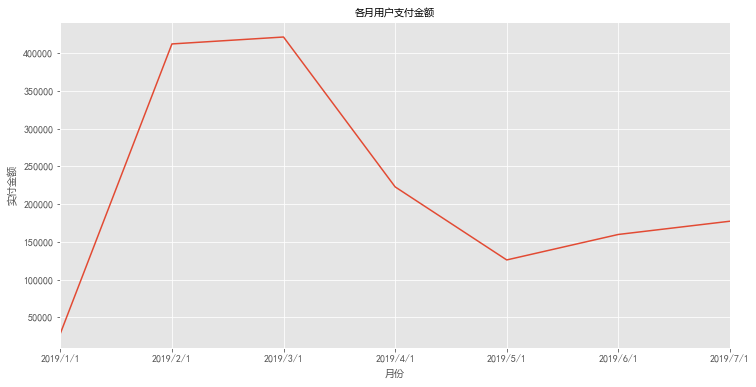

In [11]:
plt.figure(figsize = (12,6))
ax = df.groupby('month').payable_rmb_amount.sum().plot()
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("实付金额",fontproperties=chinese)
ax.set_title("各月用户支付金额",fontproperties=chinese)

In [12]:
df.groupby('month').payable_rmb_amount.sum()

month
2019/1/1     28544.64
2019/2/1    412093.04
2019/3/1    421263.63
2019/4/1    222778.42
2019/5/1    126009.79
2019/6/1    159751.58
2019/7/1    177289.85
Name: payable_rmb_amount, dtype: float64

#### 19年2-3月销量达到高峰，之后4-5出现一次大幅下降，最后趋于平稳

Text(0.5, 1.0, '各月用户购买商品数(订单数)')

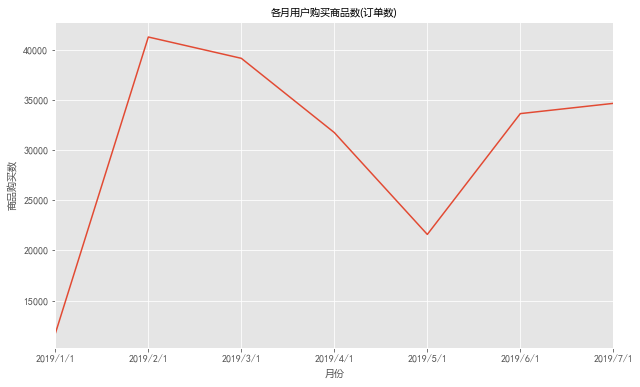

In [13]:
plt.figure(figsize = (10,6))
ax = df.groupby('month').buy_num.sum().plot()
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("商品购买数",fontproperties=chinese)
ax.set_title("各月用户购买商品数(订单数)",fontproperties=chinese)

##### 4月销量下滑趋势没有金额幅度大，可能是商品价格下降导致

Text(0.5, 1.0, '各用户实付金额与购买商品数关系')

<Figure size 720x432 with 0 Axes>

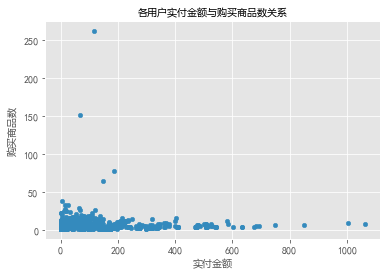

In [14]:
plt.figure(figsize = (10,6))
ax = df.groupby('user_id').sum().plot.scatter("payable_rmb_amount","buy_num")
ax.set_xlabel("实付金额",fontproperties=chinese)
ax.set_ylabel("购买商品数",fontproperties=chinese)
ax.set_title("各用户实付金额与购买商品数关系",fontproperties=chinese)

#### 总体还算正常，有极少数异常值，但数量不够影响全局

Text(0.5, 1.0, '用户购买商品数分布')

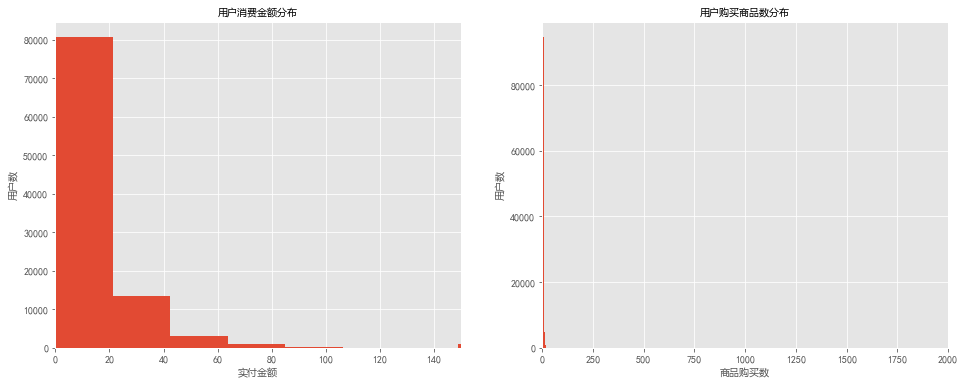

In [15]:
# 画个直方图看看分布
plt.figure(figsize=(16,6))
plt.subplot(121)
ax = df.groupby("user_id")["payable_rmb_amount"].sum().hist(bins = 50)
ax.set_xlabel("实付金额",fontproperties=chinese)
ax.set_ylabel("用户数",fontproperties=chinese)
ax.set_xlim(0,150)
ax.set_title("用户消费金额分布",fontproperties = chinese)
plt.subplot(122)
ax = df.groupby('user_id').buy_num.count().hist(bins = 50)
ax.set_xlabel('商品购买数',fontproperties = chinese)
ax.set_ylabel("用户数",fontproperties = chinese)
ax.set_xlim(0,2000)
ax.set_title("用户购买商品数分布",fontproperties = chinese)

In [16]:
print("用户首次消费月份(每月新客数)")
print(df.groupby("user_id").month.min().value_counts())

用户首次消费月份(每月新客数)
2019/2/1    35107
2019/3/1    22006
2019/4/1    12294
2019/1/1    10948
2019/6/1     9280
2019/5/1     6047
2019/7/1     4420
Name: month, dtype: int64


In [17]:
print("用户末次消费月份：(末次消费)")
print(df.groupby('user_id').month.max().value_counts())

用户末次消费月份：(末次消费)
2019/2/1    27444
2019/3/1    18383
2019/7/1    17068
2019/4/1    13504
2019/6/1    11099
2019/1/1     7496
2019/5/1     5108
Name: month, dtype: int64


### 复购率:当月购买2次及以上为复购用户

In [18]:
# 算出每个用户下单月份
df_FuGou = df.pivot_table(index='user_id',columns='month',
                             values='date',aggfunc='count').fillna(0)
df_FuGou.head(10)

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,0.0,0.0,0.0,2.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37,7.0,3.0,1.0,5.0,0.0,0.0,0.0
39,1.0,0.0,1.0,1.0,0.0,0.0,0.0
58,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [19]:
# 数据转化，消费两次及以上的记为1，一次记为0，没有消费记为NaN
df_FuGou_transf = df_FuGou.applymap(lambda x:1 if x > 1 else np.NaN if x == 0 else 0)

In [76]:
df_FuGou_transf.head()

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,0.0,NaN,NaN,NaN
13,NaN,NaN,NaN,0.0,NaN,NaN,NaN
16,NaN,NaN,NaN,1.0,NaN,NaN,NaN
35,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [77]:
df_FuGou_transf["2019/7/1"].value_counts()

1.0    9806
0.0    7262
Name: 2019/7/1, dtype: int64

In [78]:
df_FuGou_transf["2019/6/1"].value_counts()

0.0    13890
1.0     8011
Name: 2019/6/1, dtype: int64

In [80]:
8011/(8011+13890)

0.3657823843660107

Text(0.5, 1.0, '各月复购率')

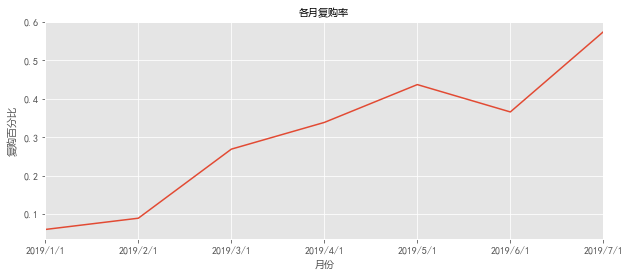

In [20]:
#计算复购率并作图
ax = (df_FuGou_transf.sum()/df_FuGou_transf.count()).plot(figsize = (10,4))
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("复购百分比",fontproperties=chinese)
ax.set_title("各月复购率",fontproperties=chinese)

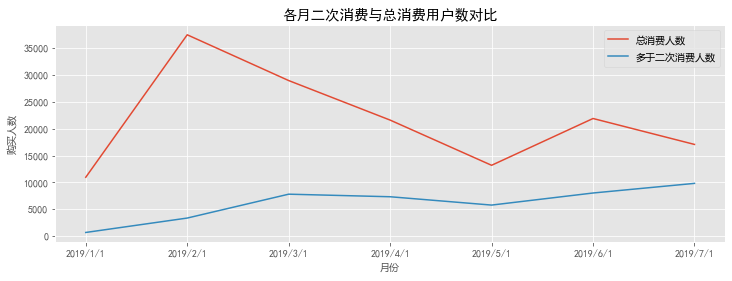

In [21]:
# 细分一下

fig , ax = plt.subplots(figsize = (12,4))
ax.plot(df_FuGou_transf.count())
ax.plot(df_FuGou_transf.sum())
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("购买人数",fontproperties=chinese)
ax.set_title("各月二次消费与总消费用户数对比")
legends = ["总消费人数","多于二次消费人数"]
ax.legend(legends,prop=chinese,loc='upper right')

##### 复购人数从19年3月起开始趋于稳定，证明沉淀下来此部分用户忠诚度很高。

### 回购率：某时间段内消费的用户，在下个时间周期内仍消费的占比。

In [22]:
# 算出每个用户各月购买次数
df_HuiGou = df.pivot_table(index="user_id",columns="month",
                          values="date",aggfunc='count').fillna(0)
df_HuiGou.head()

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,0.0,0.0,0.0,2.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# 数据转化，购买过为1，没买为0
df_HuiGou_transf = df_HuiGou.applymap(lambda x:1 if x>0 else 0)
df_HuiGou_transf.head(10)

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,0,1,0,0,0,0,0
11,0,0,0,1,0,0,0
13,0,0,0,1,0,0,0
16,0,0,0,1,0,0,0
35,0,0,0,0,1,0,0
37,1,1,1,1,0,0,0
39,1,0,1,1,0,0,0
58,0,0,1,0,0,0,0
68,0,1,1,0,0,0,0


In [24]:
#定义函数，每个月都要跟后面一个月对比下，
#本月有消费且下月也有消费，则本月记为1，
#本月有消费且下月没有消费，则本月记为0，
#本月没有消费则为NaN，
#由于最后个月没有下月数据，规定全为NaN
def purchase_return(data):
    status = []jun
    for i in range(6):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)       
    return pd.Series(status)
#     return status
    

In [25]:
df_HuiGou_return = df_HuiGou_transf.apply(purchase_return, axis = 1)
# df_HuiGou_return.head()

In [26]:
# 出图看看
columns = df.month.sort_values().unique()
df_HuiGou_return.columns = columns

Text(0.5, 1.0, '各月回购率')

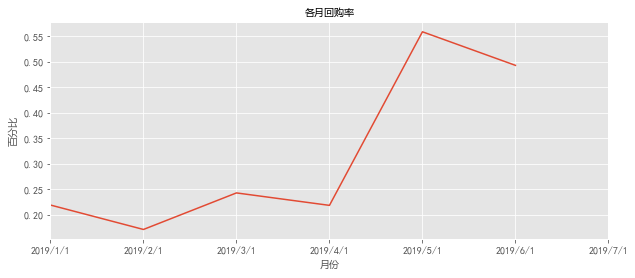

In [27]:
ax = (df_HuiGou_return.sum()/df_HuiGou_return.count()).plot(figsize = (10,4))
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("百分比",fontproperties=chinese)
ax.set_title("各月回购率",fontproperties=chinese)

##### 6，7月上了什么产品或活动吗？ 回购率超过50%

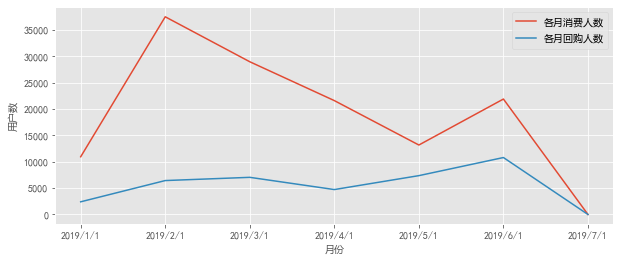

In [28]:
# 细化一下

fig,ax = plt.subplots(figsize = (10,4))
ax.plot(df_HuiGou_return.count()) # 消费人数
ax.plot(df_HuiGou_return.sum()) # 回购人数
ax.set_xlabel("月份",fontproperties=chinese)
ax.set_ylabel("用户数",fontproperties=chinese)
legends = ["各月消费人数","各月回购人数"]
ax.legend(legends,prop=chinese,loc="upper right")

#####  与复购人数接近，5000-10000，趋势平稳，证明这部分用户已经养成了固定使用消费习惯。应该是同一拨人，稍后会验证一下。 但是7月表现出下滑趋势。

#### 2率都呈现上升趋势，后几个月基本与总消费人数变化趋势相近

### 用户分层
##### 新用户的定义是第一次消费。活跃用户即老客，在某一个时间窗口内有过消费。不活跃用户则是时间窗口内没有消费过的老客。回流用户是在上一个窗口中没有消费，而在当前时间窗口内有过消费。以上的时间窗口都是按月统计。

In [81]:
def active_status(data):
    status = []
    for i in range(7):
        
        #若本月没有消费
        if data[i] == 0:
            if len(status) > 0:
                if status[i-1] == '未注册':
                    status.append('未注册')
                else:
                    status.append('不活跃')
            else:
                status.append('未注册')
                
        # 若本月有消费
        else:
            if len(status) == 0:
                status.append('新客')
            else:
                if status[i-1] == '不活跃':
                    status.append('召回用户')
                elif status[i-1] == '未注册':
                    status.append('新客')
                else:
                    status.append('活跃')
    return status

In [82]:
df_FenCeng = df.pivot_table(index="user_id",columns="month",
                          values="date",aggfunc='count').fillna(0)
df_FenCeng.head()

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16,0.0,0.0,0.0,2.0,0.0,0.0,0.0
35,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# 数据转化，购买过为1，没买为0
df_FenCeng_transf = df_FenCeng.applymap(lambda x:1 if x>0 else 0)
df_FenCeng_transf.head(10)

month,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,0,1,0,0,0,0,0
11,0,0,0,1,0,0,0
13,0,0,0,1,0,0,0
16,0,0,0,1,0,0,0
35,0,0,0,0,1,0,0
37,1,1,1,1,0,0,0
39,1,0,1,1,0,0,0
58,0,0,1,0,0,0,0
68,0,1,1,0,0,0,0


In [84]:
df_FenCeng_status = df_FenCeng_transf.apply(lambda x: pd.Series(active_status(x)),axis=1)
df_FenCeng_status.columns = columns
df_FenCeng_status.head()

,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
user_id,,,,,,,
3,未注册,新客,不活跃,不活跃,不活跃,不活跃,不活跃
11,未注册,未注册,未注册,新客,不活跃,不活跃,不活跃
13,未注册,未注册,未注册,新客,不活跃,不活跃,不活跃
16,未注册,未注册,未注册,新客,不活跃,不活跃,不活跃
35,未注册,未注册,未注册,未注册,新客,不活跃,不活跃


In [85]:
# 统计每月各分类用户，未注册用户数不计数替换成NaN
df_FenCeng_count = df_FenCeng_status.replace("未注册",np.NaN).apply(lambda x:pd.value_counts(x))
df_FenCeng_count

,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
不活跃,NaN,8546.0,39084,58750,73224,73781,83034
召回用户,NaN,NaN,538,2265,2405,5254,1846
新客,10948.0,35107.0,22006,12294,6047,9280,4420
活跃,NaN,2402.0,6433,7046,4726,7367,10802


Text(0.5, 1.0, '各月各类用户占比')

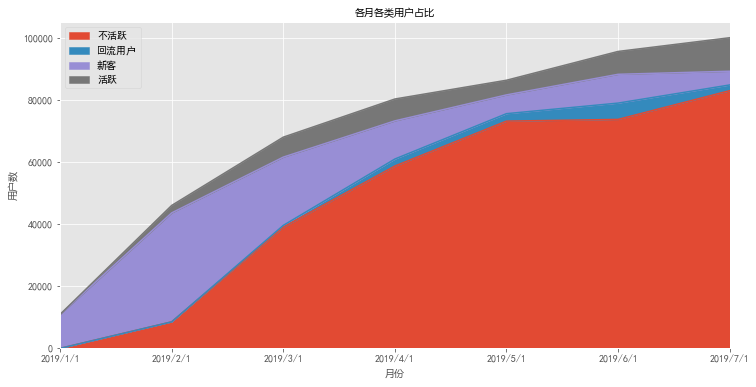

In [34]:
# 出图看看
ax = df_FenCeng_count.fillna(0).T.plot.area(figsize = (12,6))
ax.set_xlabel("月份", fontproperties=chinese)
ax.set_ylabel("用户数", fontproperties=chinese)
ax.set_title("各月各类用户占比", fontproperties=chinese)

In [35]:
# 回流占比：某个时间窗口内回流用户在总用户中的占比。
return_rate = df_FenCeng_count.apply(lambda x: x/x.sum())

In [36]:
return_rate

,2019/1/1,2019/2/1,2019/3/1,2019/4/1,2019/5/1,2019/6/1,2019/7/1
不活跃,NaN,0.185561,0.574250,0.731131,0.847480,0.771106,0.829494
回流用户,NaN,NaN,0.007905,0.028187,0.027835,0.054911,0.018441
新客,1.0,0.762284,0.323328,0.152996,0.069987,0.096988,0.044155
活跃,NaN,0.052155,0.094518,0.087686,0.054698,0.076995,0.107910


Text(0.5, 1.0, '每月回流用户占比')

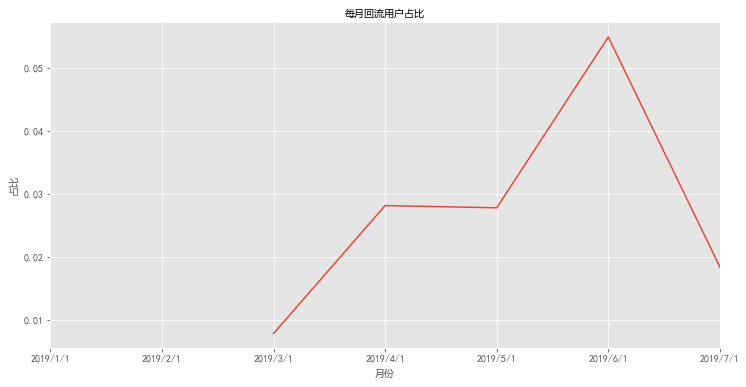

In [37]:
ax = return_rate.loc['回流用户'].plot(figsize = (12,6))
ax.set_xlabel('月份', fontproperties=chinese) 
ax.set_ylabel('占比', fontproperties=chinese) 
ax.set_title('每月回流用户占比', fontproperties=chinese)

Text(0.5, 1.0, '每月活跃用户占比')

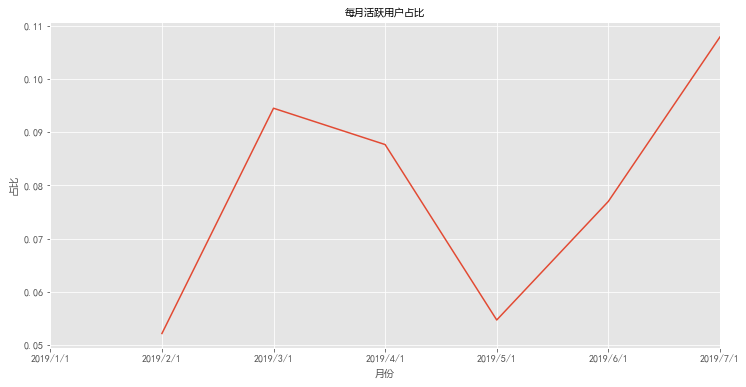

In [38]:
ax = return_rate.loc['活跃'].plot(figsize = (12,6))
ax.set_xlabel('月份', fontproperties=chinese) 
ax.set_ylabel('占比', fontproperties=chinese) 
ax.set_title('每月活跃用户占比', fontproperties=chinese)

### 用户质量：高质量用户贡献了多少消费？

In [39]:
user_amount = df.groupby("user_id").payable_rmb_amount.sum().sort_values().reset_index()
user_amount['amount_cumsum'] = user_amount.payable_rmb_amount.cumsum()

In [40]:
user_amount.tail()

,user_id,payable_rmb_amount,amount_cumsum
100097,6999864,693.00,1.544065e+06
100098,2798554,749.00,1.544814e+06
100099,3282631,848.99,1.545663e+06
100100,645982,1005.00,1.546668e+06
100101,3785486,1062.55,1.547731e+06


Text(0.5, 1.0, '用户累计贡献金额百分比')

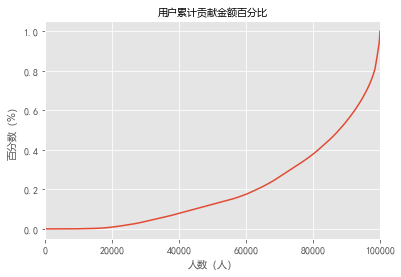

In [41]:
#计算出各阶段金额占总金额的百分比
amount_total = user_amount.amount_cumsum.max()
user_amount['prop'] = user_amount.amount_cumsum.apply(lambda x: x / amount_total)
ax = user_amount.prop.plot()
ax.set_xlabel('人数（人）', fontproperties=chinese) 
ax.set_ylabel('百分数（%）', fontproperties=chinese) 
ax.set_title('用户累计贡献金额百分比', fontproperties=chinese)

##### 典型的二八分布，共101911人中，前80000人贡献了不到40%的消费。。。

### 用户生命周期:这里我们定义第一次消费至最后一次消费为整个用户生命。

In [42]:
df_life = df

In [43]:
df.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1/1
1,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1/1
2,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1/1
3,9937889,2019/1/1 11:04,7.0,1,2019/1/1,2019/1/1
4,4963922,2019/1/1 11:19,7.0,1,2019/1/1,2019/1/1


In [44]:
order_date_min = df_life.groupby('user_id').create_date.min()
order_date_min = pd.to_datetime(order_date_min)
order_date_max = df_life.groupby('user_id').create_date.max()
order_date_max = pd.to_datetime(order_date_max)

In [45]:
life_time = (order_date_max-order_date_min).reset_index()
life_time.describe()

,user_id,create_date
count,1.001020e+05,100102
mean,5.733906e+06,20 days 14:26:31.957603
std,4.123792e+06,39 days 06:55:30.256647
min,3.000000e+00,-27 days +21:12:00
25%,2.197772e+06,0 days 00:00:00
50%,4.599300e+06,0 days 00:00:00
75%,9.534100e+06,26 days 03:12:30
max,1.697181e+07,209 days 00:34:00


In [46]:
life_time.sort_values(by="create_date")

,user_id,create_date
30332,2542414,-27 days +21:12:00
99576,15640726,-26 days +00:00:00
48412,4370861,-26 days +00:00:00
84803,10871397,-26 days +00:00:00
12597,1132826,-26 days +01:29:00
23622,2073366,-26 days +02:32:00
9136,853998,-26 days +08:58:00
72061,9197743,-26 days +09:14:00
55831,5589305,-26 days +13:41:00
17659,1563149,-26 days +18:39:00


##### 用户平均生命周期为20天，超过一半的用户的首次购买也是最后消费，75分为天数为26天，大约均值，即最后25%的用户是为对商城贡献由主要贡献的高质量用户,最大用户购买周期是209天，和取值天数211天几乎相等。说明有用户从商场上线就一直有消费意愿。

In [47]:

import datetime
d1 = datetime.datetime(2019,1,1)   # 第一个日期
d2 = datetime.datetime(2019,7,31)   # 第二个日期
interval = d2 - d1                   # 两日期差距
interval.days 


211

In [48]:
life_time['life_time'] = life_time.create_date/np.timedelta64(1,'D')

In [49]:
len(life_time[life_time.life_time > 0])

36356

Text(0.5, 1.0, '二次消费以上用户的生命周期直方图')

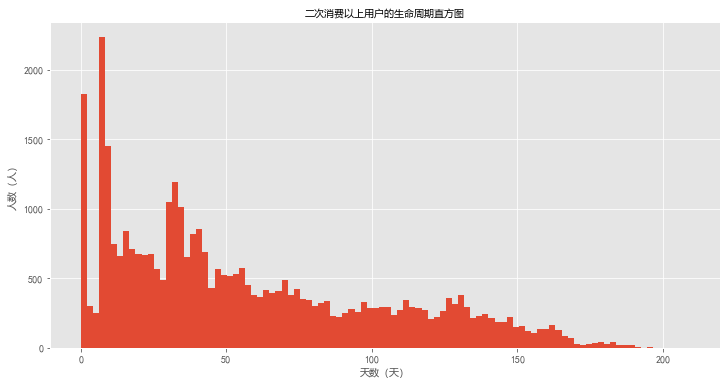

In [50]:
ax = life_time[life_time.life_time > 0].life_time.hist(bins =100,figsize = (12,6))
ax.set_xlabel('天数（天）', fontproperties=chinese) 
ax.set_ylabel('人数（人）', fontproperties=chinese) 
ax.set_title('二次消费以上用户的生命周期直方图', fontproperties=chinese)

In [51]:
# 生命周期在200天以上的用户数
len(life_time[life_time.life_time > 150])

1434

In [52]:
# 生命周期总用户数平均值
life_time[life_time.life_time > 0].life_time.mean()

57.38792186984268

##### 二次购买两次以上的用户生命周期为62天，根据运营角度说明，应该更多引导用户二次消费，从而提高用户生命周期，能带来2倍的增量。

### 留存率：第一次消费后有多少比率进行第二次消费

In [53]:
df_retention = df

In [54]:
user_purchase_retention = pd.merge(left = df_retention, right = order_date_min.reset_index(), how = 'inner', on = 'user_id', suffixes=('', '_min'))


In [55]:
user_purchase_retention.head()

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min
0,3059210,2019/1/1 7:32,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:32:00
1,3059210,2019/2/11 20:54,7.0,1,2019/2/11,2019/2/1,2019-01-01 07:32:00
2,2055349,2019/1/1 7:38,7.0,1,2019/1/1,2019/1/1,2019-01-01 07:38:00
3,9457140,2019/1/1 8:46,7.0,1,2019/1/1,2019/1/1,2019-01-01 08:46:00
4,9457140,2019/1/24 10:44,0.1,1,2019/1/24,2019/1/1,2019-01-01 08:46:00


In [56]:
user_purchase_retention["create_date"] = pd.to_datetime(user_purchase_retention["create_date"])

In [57]:
user_purchase_retention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213843 entries, 0 to 213842
Data columns (total 7 columns):
user_id               213843 non-null int64
create_date           213843 non-null datetime64[ns]
payable_rmb_amount    213843 non-null float64
buy_num               213843 non-null int64
date                  213843 non-null object
month                 213843 non-null object
create_date_min       213843 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 13.1+ MB


In [58]:
user_purchase_retention['order_date_diff'] = user_purchase_retention.create_date - user_purchase_retention.create_date_min
user_purchase_retention['date_diff'] = user_purchase_retention.order_date_diff.apply(lambda x: x/np.timedelta64(1,'D'))
user_purchase_retention = user_purchase_retention.sort_values(by="order_date_diff",ascending=True)
user_purchase_retention.head(30)

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min,order_date_diff,date_diff
190368,10951820,2019-05-04 07:33:00,4.99,1,2019/5/4,2019/5/1,2019-05-31 08:01:00,-28 days +23:32:00,-27.019444
127137,5357462,2019-05-04 08:00:00,2.09,1,2019/5/4,2019/5/1,2019-05-31 08:00:00,-27 days +00:00:00,-27.000000
183037,971206,2019-05-04 08:20:00,2.99,1,2019/5/4,2019/5/1,2019-05-31 08:01:00,-27 days +00:19:00,-26.986806
183196,608516,2019-05-05 00:56:00,3.99,1,2019/5/5,2019/5/1,2019-05-31 08:00:00,-27 days +16:56:00,-26.294444
99274,2542414,2019-03-04 08:28:00,0.10,1,2019/3/4,2019/3/1,2019-03-30 11:16:00,-27 days +21:12:00,-26.116667
6064,6809671,2019-01-03 06:32:00,7.00,1,2019/1/3,2019/1/1,2019-01-29 06:35:00,-27 days +23:57:00,-26.002083
210950,10871397,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000
210967,4370861,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000
200646,15640726,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000
182859,1132826,2019-05-03 09:29:00,4.99,1,2019/5/3,2019/5/1,2019-05-29 08:00:00,-26 days +01:29:00,-25.938194


In [59]:
user_purchase_retention[user_purchase_retention["user_id"]  == 190368 ]

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min,order_date_diff,date_diff


In [60]:
bin = [0,30,60,90,120,150,180]
user_purchase_retention['date_diff_bin'] = pd.cut(user_purchase_retention.date_diff, bins = bin)
user_purchase_retention.head(20)

,user_id,create_date,payable_rmb_amount,buy_num,date,month,create_date_min,order_date_diff,date_diff,date_diff_bin
190368,10951820,2019-05-04 07:33:00,4.99,1,2019/5/4,2019/5/1,2019-05-31 08:01:00,-28 days +23:32:00,-27.019444,NaN
127137,5357462,2019-05-04 08:00:00,2.09,1,2019/5/4,2019/5/1,2019-05-31 08:00:00,-27 days +00:00:00,-27.000000,NaN
183037,971206,2019-05-04 08:20:00,2.99,1,2019/5/4,2019/5/1,2019-05-31 08:01:00,-27 days +00:19:00,-26.986806,NaN
183196,608516,2019-05-05 00:56:00,3.99,1,2019/5/5,2019/5/1,2019-05-31 08:00:00,-27 days +16:56:00,-26.294444,NaN
99274,2542414,2019-03-04 08:28:00,0.10,1,2019/3/4,2019/3/1,2019-03-30 11:16:00,-27 days +21:12:00,-26.116667,NaN
6064,6809671,2019-01-03 06:32:00,7.00,1,2019/1/3,2019/1/1,2019-01-29 06:35:00,-27 days +23:57:00,-26.002083,NaN
210950,10871397,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000,NaN
210967,4370861,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000,NaN
200646,15640726,2019-07-03 08:00:00,3.99,1,2019/7/3,2019/7/1,2019-07-29 08:00:00,-26 days +00:00:00,-26.000000,NaN
182859,1132826,2019-05-03 09:29:00,4.99,1,2019/5/3,2019/5/1,2019-05-29 08:00:00,-26 days +01:29:00,-25.938194,NaN


In [61]:
pivoted_retention= user_purchase_retention.groupby(['user_id','date_diff_bin']).payable_rmb_amount.sum().unstack()
pivoted_retention.head(10)

date_diff_bin  (0, 30]  (30, 60]  (60, 90]  (90, 120]  (120, 150]  (150, 180]
user_id                                                                      
16                0.99       NaN       NaN        NaN         NaN         NaN
37              227.95     14.68       NaN      28.19         NaN         NaN
39                 NaN     16.99       NaN       0.00         NaN         NaN
68                 NaN      3.09       NaN        NaN         NaN         NaN
71                0.65       NaN       0.0       1.39        2.35         0.2
73                 NaN      7.00       5.0        NaN       15.00         NaN
87              338.10       NaN       NaN       0.00         NaN         NaN
89                 NaN       NaN       NaN       0.00         NaN         NaN
91               23.99     13.44       NaN        NaN         NaN         NaN
94                0.00       NaN       NaN        NaN         NaN         NaN

In [62]:
pivoted_retention2= user_purchase_retention.groupby(['user_id','date_diff_bin']).buy_num.sum().unstack()
pivoted_retention2.head(10)

date_diff_bin  (0, 30]  (30, 60]  (60, 90]  (90, 120]  (120, 150]  (150, 180]
user_id                                                                      
16                 1.0       NaN       NaN        NaN         NaN         NaN
37                 8.0       2.0       NaN        5.0         NaN         NaN
39                 NaN       1.0       NaN        1.0         NaN         NaN
68                 NaN       1.0       NaN        NaN         NaN         NaN
71                 3.0       NaN       1.0        4.0         8.0         4.0
73                 NaN       1.0       1.0        NaN         1.0         NaN
87                 5.0       NaN       NaN        1.0         NaN         NaN
89                 NaN       NaN       NaN        1.0         NaN         NaN
91                 2.0       1.0       NaN        NaN         NaN         NaN
94                 1.0       NaN       NaN        NaN         NaN         NaN

Text(0.5, 1.0, '各时间段的用户留存率')

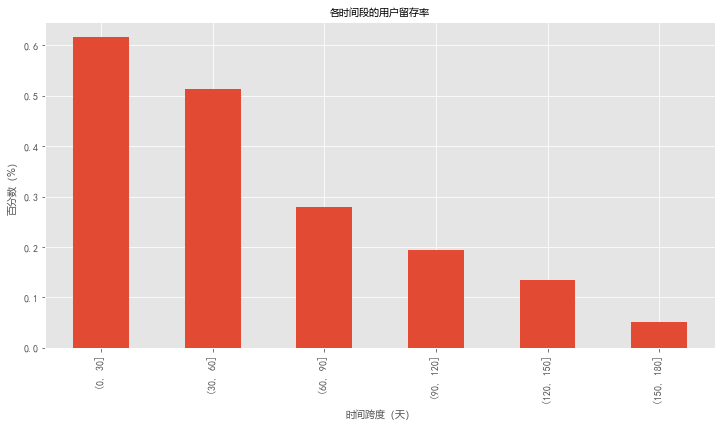

In [63]:
# 直接用金额表达不出留存率，我们还是按照之前的算法，把消费过的转换成1，未消费过的转换成0，毕竟留存率看的是是否有消费。
pivoted_retention_trans = pivoted_retention.fillna(0).applymap(lambda x: 1 if x >0 else 0)
ax = (pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize = (12,6))
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('百分数（%）', fontproperties=chinese) 
ax.set_title('各时间段的用户留存率', fontproperties=chinese)

##### 由上图可知，头一个月留存高达65%，次月留存也在50%左右。但是第三个月就掉到30%以下。从第三个月开始就趋势性减少。从运营角度来看，这对刺激引导消费的活动或营销政策应该集中在前两个月开始使用，特别的第一个月。

##### 为了更好的确定营销节点，在看下平均购买周期。

### 平均购买周期：用户两次购买之间的间隔

In [64]:
#创建函数，返回时间差
def diff(group):
    d = group.date_diff - group.date_diff.shift(-1)
    return d

In [65]:
user_purchase_retention = user_purchase_retention.sort_values(by="order_date_diff",ascending=True)

In [66]:
user_purchase_retention["order_date_diff"][0:20]

190368   -28 days +23:32:00
127137   -27 days +00:00:00
183037   -27 days +00:19:00
183196   -27 days +16:56:00
99274    -27 days +21:12:00
6064     -27 days +23:57:00
210950   -26 days +00:00:00
210967   -26 days +00:00:00
200646   -26 days +00:00:00
182859   -26 days +01:29:00
119919   -26 days +02:12:00
74671    -26 days +02:32:00
105872   -26 days +05:57:00
189258   -26 days +08:58:00
99318    -26 days +09:14:00
124670   -26 days +12:52:00
185      -26 days +13:41:00
71789    -26 days +18:39:00
74544    -26 days +19:10:00
74543    -26 days +19:11:00
Name: order_date_diff, dtype: timedelta64[ns]

In [67]:
last_diff = user_purchase_retention.groupby('user_id').apply(diff)


In [68]:
last_dd = last_diff.reset_index()

In [69]:
last_dd[last_dd["user_id"] == 9835106]

,user_id,level_1,date_diff
168205,9835106,19,-23.995139
168206,9835106,24,-27.729861
168207,9835106,20,-72.641667
168208,9835106,22,-7.997917
168209,9835106,23,-7.993056
168210,9835106,21,-0.004167
168211,9835106,25,-39.063889
168212,9835106,26,NaN


Text(0.5, 1.0, '用户平均购买周期直方图')

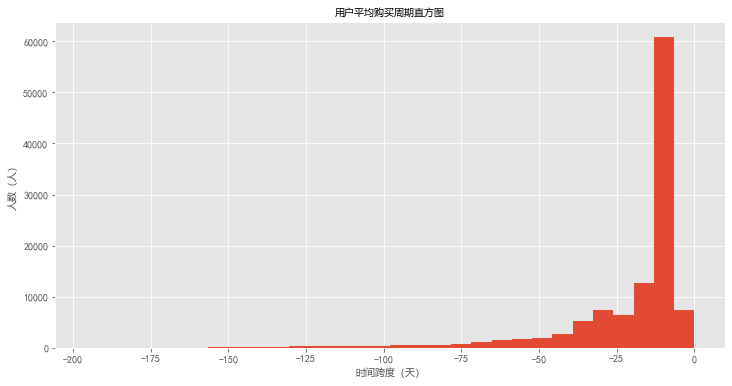

In [88]:
fig, ax = plt.subplots(figsize = (12,6))
ax = last_diff.hist(bins = 30)
ax.set_xlabel('时间跨度（天）', fontproperties=chinese) 
ax.set_ylabel('人数（人）', fontproperties=chinese) 
ax.set_title('用户平均购买周期直方图', fontproperties=chinese)

In [71]:
user_purchase_retention[["user_id","date_diff"]].head(30)

,user_id,date_diff
190368,10951820,-27.019444
127137,5357462,-27.000000
183037,971206,-26.986806
183196,608516,-26.294444
99274,2542414,-26.116667
6064,6809671,-26.002083
210950,10871397,-26.000000
210967,4370861,-26.000000
200646,15640726,-26.000000
182859,1132826,-25.938194


In [72]:
user_purchase_retention['date_diff'][0:10]

190368   -27.019444
127137   -27.000000
183037   -26.986806
183196   -26.294444
99274    -26.116667
6064     -26.002083
210950   -26.000000
210967   -26.000000
200646   -26.000000
182859   -25.938194
Name: date_diff, dtype: float64

In [73]:
user_purchase_retention['date_diff'][0:10].shift(-1)

190368   -27.000000
127137   -26.986806
183037   -26.294444
183196   -26.116667
99274    -26.002083
6064     -26.000000
210950   -26.000000
210967   -26.000000
200646   -25.938194
182859          NaN
Name: date_diff, dtype: float64